In [1]:
def get_data(filename_folder,filename_csv):
    # train.csv 파일 읽어오기
    df = pd.read_csv(filename_csv)
    # 이미지 파일 이름 불러오기
    img_names = df["data"]

    # 이미지를 저장할 ndarray 생성
    images = np.zeros((img_names.shape[0],64,64,3))

    # 이미지 저장
    for index,name in enumerate(img_names):
        images[index] = image.load_img(filename_folder+"/"+name)

    # 레이블 저장
    label = df["label"]

    return images, label

In [2]:
def showGraph(hist):
    # 정확률 곡선
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.grid()
    plt.show()

    # 손실 함수 곡선
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.grid()
    plt.show()

In [3]:
# 테스트 집합 예측 후 엑셀에 output(label) 저장하기
def result_toExcel(cnn, x_test):
    res = cnn.predict(x_test)
    res_real = np.zeros((x_test.shape[0],1))

    for i in range(x_test.shape[0]):
        for j in range(5):
            if(max(res[i]) == res[i][j]):
                res_real[i] = j

    res_real = res_real.astype(np.uint32)

    df = pd.DataFrame(res_real,columns=['label'])

    filename = input("저장할 파일명 : ")
    filename += ".xlsx"
    df.to_excel(filename,sheet_name='label',index=False,header=False)

In [5]:
def build_model():
    model=Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5,activation='softmax'))
    return model

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-06-06 00:26:58.762765: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-06 00:26:58.763497: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/50


2022-06-06 00:26:59.020670: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-06 00:26:59.317027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-06 00:27:06.819704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


76/76 - 9s - loss: 1.5004 - accuracy: 0.3346 - val_loss: 1.3087 - val_accuracy: 0.4509 - 9s/epoch - 113ms/step
Epoch 2/50
76/76 - 8s - loss: 1.2701 - accuracy: 0.4785 - val_loss: 1.1269 - val_accuracy: 0.5458 - 8s/epoch - 104ms/step
Epoch 3/50
76/76 - 8s - loss: 1.1601 - accuracy: 0.5430 - val_loss: 1.1655 - val_accuracy: 0.5413 - 8s/epoch - 103ms/step
Epoch 4/50
76/76 - 8s - loss: 1.0625 - accuracy: 0.5834 - val_loss: 1.0664 - val_accuracy: 0.5809 - 8s/epoch - 100ms/step
Epoch 5/50
76/76 - 8s - loss: 0.9901 - accuracy: 0.6131 - val_loss: 1.0141 - val_accuracy: 0.6345 - 8s/epoch - 100ms/step
Epoch 6/50
76/76 - 8s - loss: 0.9473 - accuracy: 0.6316 - val_loss: 0.8313 - val_accuracy: 0.6889 - 8s/epoch - 103ms/step
Epoch 7/50
76/76 - 8s - loss: 0.9107 - accuracy: 0.6436 - val_loss: 0.8549 - val_accuracy: 0.6819 - 8s/epoch - 104ms/step
Epoch 8/50
76/76 - 8s - loss: 0.8707 - accuracy: 0.6601 - val_loss: 0.8807 - val_accuracy: 0.6716 - 8s/epoch - 105ms/step
Epoch 9/50
76/76 - 8s - loss: 0.846

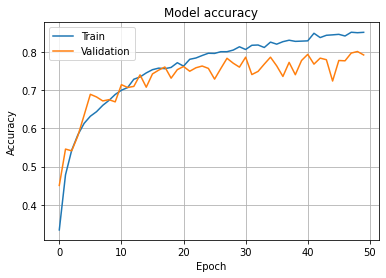

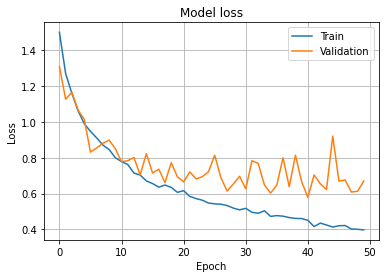

In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 가져오기
images, label = get_data("train","train.csv")

# 훈련집합과 테스트집합으로 분할
x_train,x_test,y_train,y_test=train_test_split(images,label,stratify=label,test_size=0.2)

x_train=x_train.astype(np.float32)/255.0 # 정규화
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,5) # 원핫코드로 변환(레이블은 0,1,2,3,4 총 5개 부류)
y_test=tf.keras.utils.to_categorical(y_test,5)

cnn = build_model()

cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
# 데이터 증대
generator=ImageDataGenerator(zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
hist=cnn.fit(generator.flow(x_train,y_train,batch_size=128),epochs=50,validation_data=(x_test,y_test),verbose=2)
# hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

showGraph(hist)

In [7]:
# 모델 저장하기
cnn.save('final_Dropout_cnn.h5')

In [10]:
import tensorflow as tf
import numpy as np
import pandas as pd
import openpyxl
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

cnn=tf.keras.models.load_model("final_Dropout_cnn.h5")
cnn.summary()

images, label = get_data("train_original","train_original.csv")

x_test = images.astype(np.float32)/255
y_test = tf.keras.utils.to_categorical(label,5)

res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                        

2022-06-06 00:36:16.985149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


정확률은 92.20000505447388


In [36]:
result_toExcel(cnn, x_test)

313/313 [==============================] - 4s 14ms/step
